# **Step 1** : Data Collection

---
**Dataset Path:** "Data/WaterQualityPrediction"  
---

We will work with the Water Quality Prediction dataset. This dataset contains various physical, chemical, and categorical features related to water samples. The goal is to analyze and predict water quality based on these attributes. The dataset includes a wide range of measurements, such as pH level, concentrations of various elements, and categorical attributes like color and odor, which collectively provide insights into the quality of the water.

**Features:**

*   **Index:** Unique identifier for each sample. (Can be ignored for modeling).
*   **pH:** pH level of the water (numerical).
*   **Iron:** Iron concentration in the water (numerical).
*   **Nitrate:** Nitrate concentration in the water (numerical).
*   **Chloride:** Chloride concentration in the water (numerical).
*   **Lead:** Lead concentration in the water (numerical).
*   **Zinc:** Zinc concentration in the water (numerical).
*   **Color:** Color of the water (categorical).
*   **Turbidity:** Turbidity of the water (numerical).
*   **Fluoride:** Fluoride concentration in the water (numerical).
*   **Copper:** Copper concentration in the water (numerical).
*   **Odor:** Odor of the water (numerical).
*   **Sulfate:** Sulfate concentration in the water (numerical).
*   **Conductivity:** Conductivity of the water (numerical).
*   **Chlorine:** Chlorine concentration in the water (numerical).
*   **Manganese:** Manganese concentration in the water (numerical).
*   **Total Dissolved Solids:** Total dissolved solids in the water (numerical).
*   **Source:** Source of the water sample (categorical).
*   **Water Temperature:** Temperature of the water (numerical).
*   **Air Temperature:** Air temperature (numerical).
*   **Month:** Month the sample was taken (categorical).
*   **Day:** Day of the month the sample was taken (numerical).
*   **Time of Day:** Time of day the sample was taken (numerical).
*   **Target:** Target variable indicating water quality (numerical/categorical - *clarification needed*).

In [5]:
# Import necessary libraries
import gdown
import random 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_recall_curve 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc
from yellowbrick.cluster import KElbowVisualizer

In [6]:
# Google Drive file ID
file_id = "1sm2j6qu65nmwY-McRvGr--yo3HbU-_CN"

# Construct the download URL using the file ID
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file from Google Drive
output = "data.csv"  # The name of the file to save locally
gdown.download(url, output, quiet=False)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(output)

# Display the first few rows of the dataset
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1sm2j6qu65nmwY-McRvGr--yo3HbU-_CN
From (redirected): https://drive.google.com/uc?id=1sm2j6qu65nmwY-McRvGr--yo3HbU-_CN&confirm=t&uuid=bcf11805-d771-4844-a6b6-7222a9a0b2fa
To: C:\Users\Seyma\PycharmProjects\pythonProject2\AIN214\AIN212 notes\data.csv
100%|██████████| 246M/246M [01:19<00:00, 3.10MB/s] 


,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


# **Step 2** : Data Preprocessing and Cleaning
In step 2, null values and outliers in the dataframe were identified and handled in the most appropriate way.

In [7]:
# Check the null values for each feature
print(df.isnull().sum()) 
print(f"The dataset has {len(df)-1} rows of data.")

Index                         0
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64
The dataset has 1048574 rows of data.


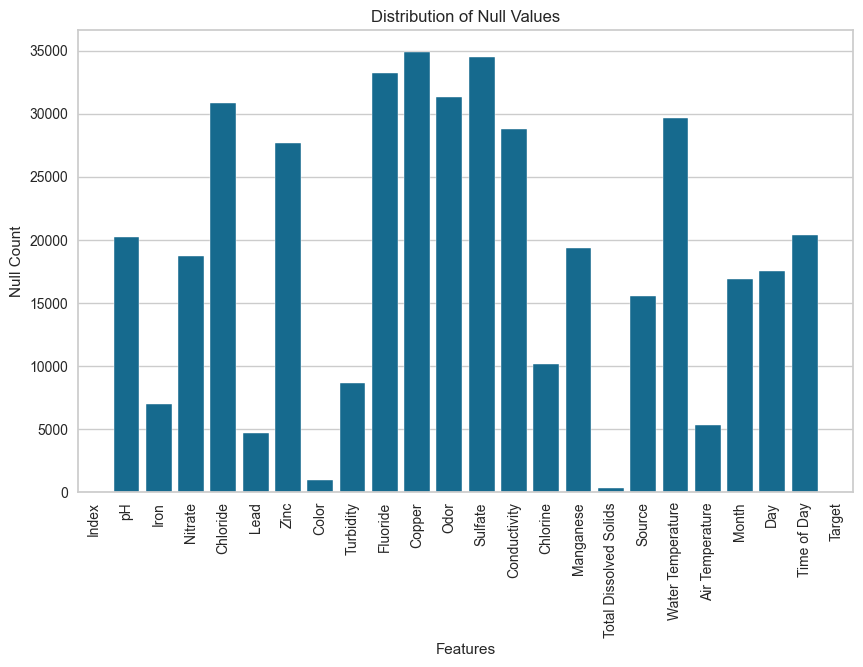

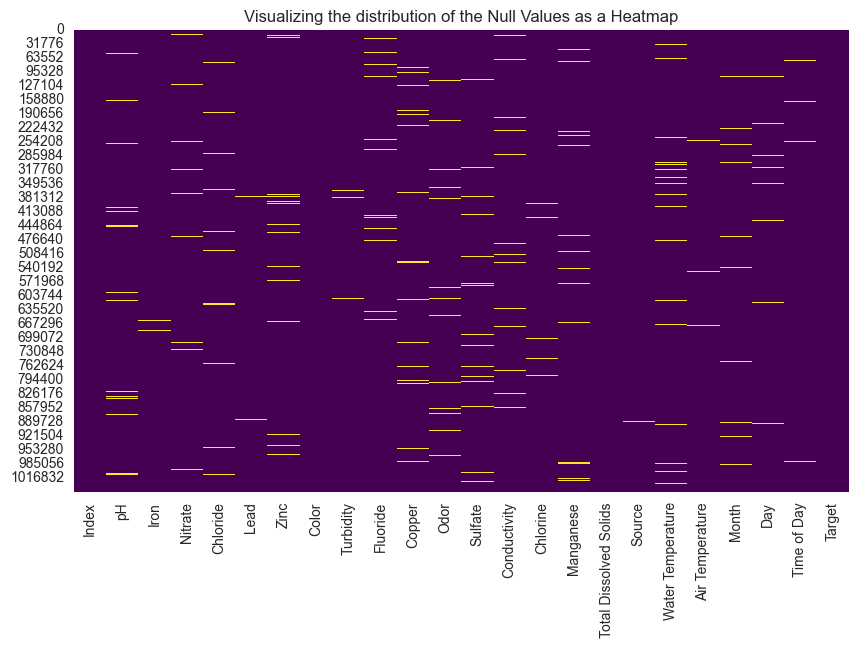

In [8]:
# The number null values.
null_counts = df.isnull().sum()

# Bar plot for the null values
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of Null Values")
plt.ylabel("Null Count")
plt.xlabel("Features")
plt.show()

# Heatmap to show the disturbition of null values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualizing the distribution of the Null Values as a Heatmap")
plt.show()

As can be observed from the distribution in the heatmap, null values are distributed quite evenly. However, it is also important to examine the distribution of the target variable in both rows containing null values and those without. The purpose of this is to determine whether the target variable is primarily concentrated in the rows with null values.

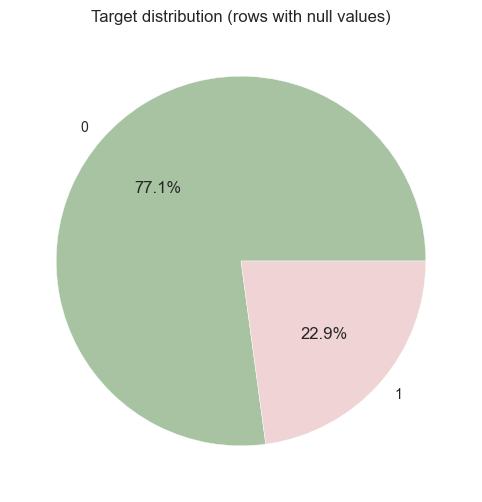

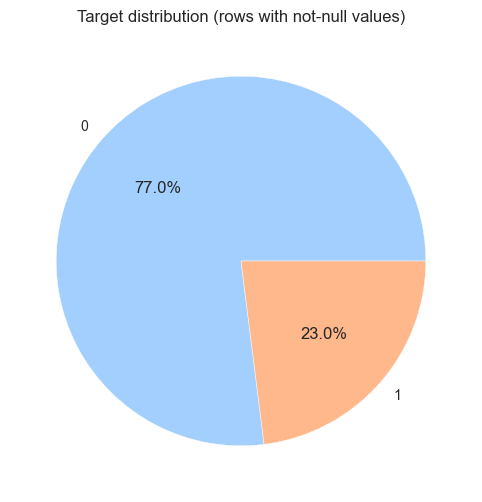

In [9]:
# Rows that has at least one null value in it.
rows_with_null = df[df.isnull().any(axis=1)]

# Rows that has not-null values in it.
rows_without_null = df[~df.isnull().any(axis=1)]

# Target disturbition (rows with null values)
target_with_null = rows_with_null['Target'].value_counts()

# Target disturbition (rows with not-null values)
target_without_null = rows_without_null['Target'].value_counts()

# Pie chart (rows with null values)
plt.figure(figsize=(8, 6))
plt.pie(target_with_null, labels=target_with_null.index, autopct='%1.1f%%', colors=['#A7C3A1', '#F0D3D5'])
plt.title("Target distribution (rows with null values)")
plt.show()

# Pie chart (rows with not-null values)
plt.figure(figsize=(8, 6))
plt.pie(target_without_null, labels=target_without_null.index, autopct='%1.1f%%', colors=['#A2CFFE', '#FFB88C'])
plt.title("Target distribution (rows with not-null values)")
plt.show()

The null values appear to be evenly distributed in both their spread and distribution. Additionally, given the sufficient amount of data available, the decision has been made to remove these null values.

In [10]:
# Drop the null values.
df = df.dropna()
print("In data we have left with ", (len(df)- 1 ), " data rows.")

In data we have left with  701055  data rows.


In [11]:
# The following columns are dropped from the dataset to improve model performance:
# 'Index', 'Color', 'Source', 'Month', 'Day', 'Time of Day'
features_to_drop = ['Index', 'Color', 'Source', 'Month', 'Day', 'Time of Day']
df.drop(columns=features_to_drop, inplace=True)  # Dropping the selected features from the dataset

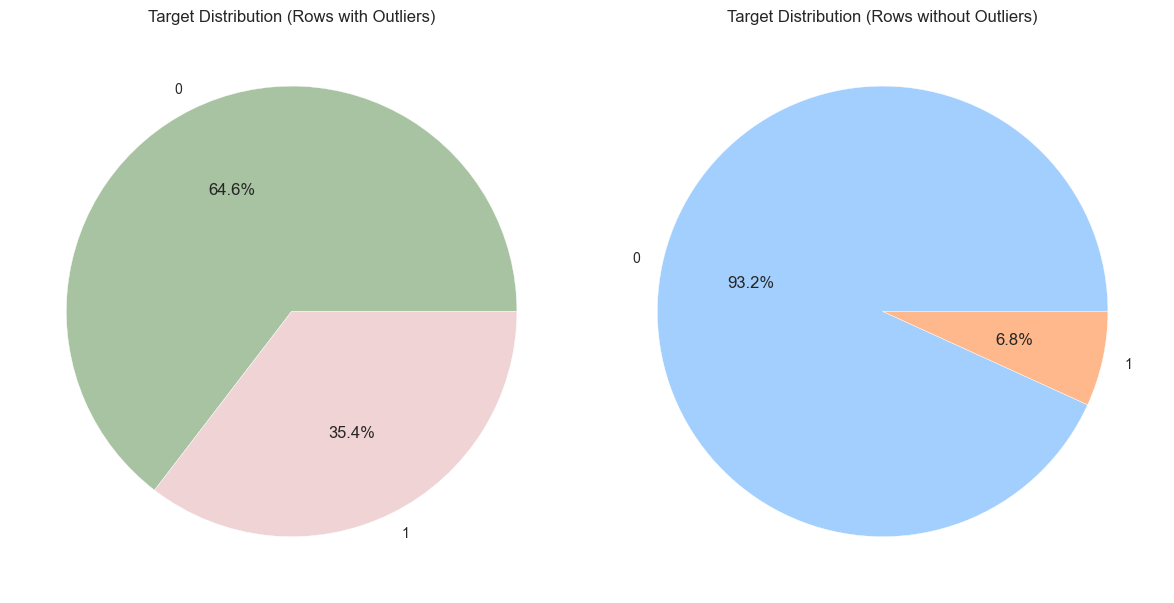


Rows with Outliers:
count    397049.000000
mean          0.354097
std           0.478239
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Target, dtype: float64

Rows without Outliers:
count    304007.000000
mean          0.068054
std           0.251840
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64

Number of Outliers (per column):
pH                         18077
Iron                      112268
Nitrate                    20810
Chloride                   20605
Lead                      172808
Zinc                       19731
Turbidity                  49169
Fluoride                   22093
Copper                     34311
Odor                           0
Sulfate                    16029
Conductivity               13319
Chlorine                   11073
Manganese                 112275
Total Dissolved Solids         0


In [12]:
df_numerical = df.copy()
df_numerical.drop(['Target'], axis=1, inplace=True)

# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers by checking if values are outside the bounds
outliers = ((df_numerical < lower_bound) | (df_numerical > upper_bound))
outliers_any = outliers.any(axis=1)

# Create a dataframe containing rows with outliers
df_with_outliers = df[outliers_any]  # Rows CONTAINING outliers

# Create a dataframe containing rows without outliers
df_no_outliers = df[~outliers_any]  # Rows WITHOUT outliers

# Distribution of the 'Target' variable for rows with outliers
target_with_outliers = df_with_outliers['Target'].value_counts()

# Distribution of the 'Target' variable for rows without outliers
target_without_outliers = df_no_outliers['Target'].value_counts()

# Plot pie charts
plt.figure(figsize=(12, 6))  # Set the figure size to display both charts side by side

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first chart
plt.pie(target_with_outliers, labels=target_with_outliers.index, autopct='%1.1f%%', colors=['#A7C3A1', '#F0D3D5'])
plt.title("Target Distribution (Rows with Outliers)")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second chart
plt.pie(target_without_outliers, labels=target_without_outliers.index, autopct='%1.1f%%',  colors=['#A2CFFE', '#FFB88C'])
plt.title("Target Distribution (Rows without Outliers)")

plt.tight_layout()  # Adjust spacing between the charts
plt.show()

# Statistical summary for rows with and without outliers
print("\nRows with Outliers:")
print(df_with_outliers['Target'].describe())

print("\nRows without Outliers:")
print(df_no_outliers['Target'].describe())

# Summary of the number of outliers for each column (excluding Target)
print("\nNumber of Outliers (per column):")
print(outliers.sum())


It is shown by these distributions that the target we are looking for is mostly located within the outlier cluster.
Therefore, outliers cannot simply be deleted as was done in the case of null values.
In fact, outliers needs to be handled with utmost care.

In [13]:
# Defining the standard deviation multiplier
std_multiplier = 3

# Dropping the 'Target' column to work only with numerical features
df_numerical = df.drop('Target', axis=1)

# Looping through each numerical column to handle outliers
for col in df_numerical.columns:
    mean = df_numerical[col].mean()  # Calculate the mean of the column
    std = df_numerical[col].std()    # Calculate the standard deviation of the column
    lower_bound = mean - std_multiplier * std  # Calculate the lower bound for outlier detection
    upper_bound = mean + std_multiplier * std  # Calculate the upper bound for outlier detection
    
    # Clip the values in the column that fall outside the bounds
    df.loc[:, col] = np.clip(df_numerical[col], lower_bound, upper_bound)

Standard trimming was used for this part. The reason for this is that median imputation, mean imputation, and constant imputation were tried. However, it was realized that our dataset was mostly composed of outliers. Changing these outliers was deemed not to be a good idea. Therefore, a weighted trimming method called standard trimming was used instead. And the best results were obtained with this method.

# **Step 3** : Data Exploration and Analysis

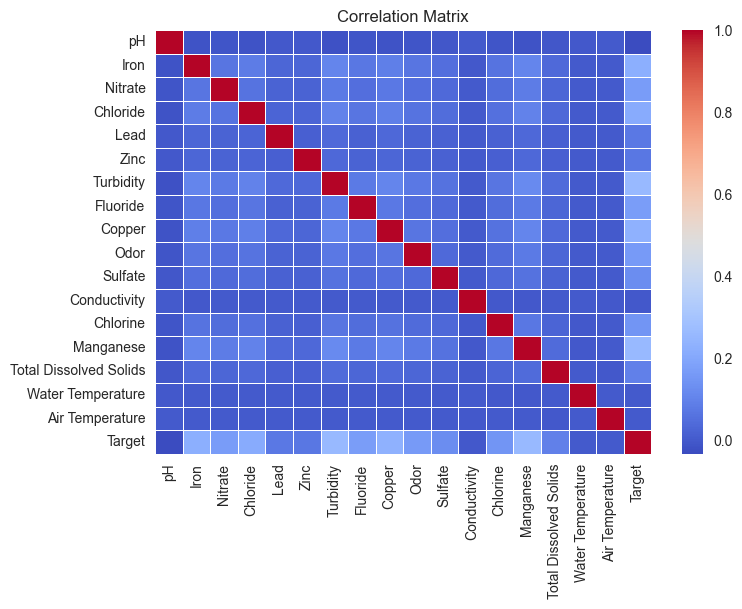

In [14]:
# Create correlation matrix 
correlation_matrix = df.corr()

# Visualize the Correlation Matrix (Heatmap)
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Although the correlation matrix shows no significant correlation between the target and other variables, Iron, Chloride, Turbidity, Copper, and Manganese exhibit a stronger correlation.

In [15]:
# df.info() provides a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 701056 entries, 1 to 1048573
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   pH                      701056 non-null  float64
 1   Iron                    701056 non-null  float64
 2   Nitrate                 701056 non-null  float64
 3   Chloride                701056 non-null  float64
 4   Lead                    701056 non-null  float64
 5   Zinc                    701056 non-null  float64
 6   Turbidity               701056 non-null  float64
 7   Fluoride                701056 non-null  float64
 8   Copper                  701056 non-null  float64
 9   Odor                    701056 non-null  float64
 10  Sulfate                 701056 non-null  float64
 11  Conductivity            701056 non-null  float64
 12  Chlorine                701056 non-null  float64
 13  Manganese               701056 non-null  float64
 14  Total Dissolved Solids  

In [16]:
# The 'df.describe()' method provides a summary of statistics for numerical columns in the dataset.
# - count: Shows the number of non-null (non-empty) entries in each column.
# - mean: Displays the average value for each column.
# - std: Displays the standard deviation of each column, indicating how spread out the values are from the mean.
# - min: Displays the minimum value in each column.
# - 25% (Q1): Indicates that 25% of the data lies below this value.
# - 50% (Median): The middle value of the data, where 50% lies below and 50% lies above this value.
# - 75% (Q3): Indicates that 75% of the data lies below this value.
# - max: Displays the maximum value in each column.
# This summary helps in understanding the distribution of numerical data and can assist in identifying potential outliers.
df.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target
count,701056.000000,7.010560e+05,701056.000000,701056.000000,7.010560e+05,7.010560e+05,7.010560e+05,701056.000000,7.010560e+05,701056.000000,701056.000000,701056.000000,701056.000000,7.010560e+05,701056.000000,701056.000000,701056.000000,701056.000000
mean,7.449671,9.020010e-02,6.007265,180.751904,4.384708e-04,1.502336e+00,4.455526e-01,0.923607,4.756597e-01,1.773779,143.488486,423.720903,3.231378,6.989528e-02,264.820722,18.940222,60.043925,0.230057
std,0.829465,2.501716e-01,2.792842,60.881880,5.623357e-03,1.385901e+00,6.435694e-01,0.713187,4.741333e-01,1.051451,61.632725,185.649127,0.694588,2.428841e-01,154.354905,10.468114,18.038956,0.420870
min,4.905572,8.010000e-45,0.286173,29.413497,0.000000e+00,6.350000e-07,1.410000e-14,0.000005,4.440000e-08,0.011006,11.940727,13.054824,1.090760,4.070000e-46,0.012183,1.274254,5.793205,0.000000
25%,6.914717,9.000000e-06,3.949197,137.421204,8.647500e-123,4.138602e-01,3.703272e-02,0.370611,1.259449e-01,0.878178,97.473125,286.443339,2.737183,2.050000e-06,131.847798,11.348949,47.852591,0.000000
50%,7.452758,2.063006e-03,5.564817,174.744666,1.695000e-62,1.075199e+00,1.996362e-01,0.765630,3.391531e-01,1.745384,133.963219,397.070710,3.198447,5.372045e-04,263.521994,16.462302,60.031030,0.000000
75%,8.000970,4.975946e-02,7.585966,215.711131,2.950000e-27,2.215828e+00,5.923177e-01,1.318171,6.790050e-01,2.612347,180.357291,533.182405,3.684807,1.369826e-02,395.037247,23.855208,72.236665,0.000000
max,9.992335,1.445019e+00,15.470041,379.255684,9.275288e-02,6.037283e+00,3.073968e+00,3.319437,2.195422e+00,4.141952,345.037147,993.732384,5.382848,1.419789e+00,579.799458,53.278254,114.293956,1.000000


**pH**:
Mean: 7.45 (indicating that the water's pH is slightly above neutral).
Standard Deviation (std): 0.83 (showing some variation from the mean, but not extreme).
Min: 4.91 and Max: 9.99, which suggests a range of typical pH values from slightly acidic to slightly alkaline.
25% Quartile: 6.91, 50% Quartile: 7.45 (median), and 75% Quartile: 8.00, indicating that the majority of data points lie between acidic and neutral.

**Iron**:
Mean: 0.09 (fairly low concentration).
Standard Deviation: 0.25, indicating a moderate spread.
Min: 0 (a significant number of samples have no detectable iron).
Max: 1.45, suggesting a wide variation in iron concentration.
The lower quartiles show most of the data clustering near very low iron levels.

**Nitrate**:
Mean: 6.01, Standard Deviation: 2.79, indicating that most values fall within the typical nitrate concentration but there is considerable variation.
Min: 0.29, Max: 15.47, suggesting a wide range of nitrate levels across the data set.

**Chloride**:
Mean: 180.75, Standard Deviation: 60.88, suggesting some fluctuation in chloride levels.
Min: 29.41, Max: 379.26, showing variability across different samples.
Chloride concentrations are relatively high compared to other features.

**Lead**:
Mean: 0.00044, with a very small concentration.
Standard Deviation: 0.0056, suggesting low but significant variability.
Min: 0 (no detectable lead in some samples), Max: 0.09275, indicating that some samples have noticeable lead levels.

**Zinc**:
Mean: 1.50, Standard Deviation: 1.39, indicating significant variability in zinc concentrations.
Min: 0.000000635, Max: 6.04, showing a wide range of values, from almost undetectable to quite high concentrations.

**Turbidity**:
Mean: 0.45, Standard Deviation: 0.64, with values ranging from 0.00 to 3.07.
This suggests a substantial variation in the turbidity (cloudiness) of the water.

**Fluoride**:
Mean: 0.92, Standard Deviation: 0.71.
Min: 0.000005, Max: 3.32, with a large spread indicating some extreme outliers.

**Copper**:
Mean: 0.48, Standard Deviation: 0.47, showing moderate fluctuation in copper concentrations.
Min: 0.00, Max: 2.20, indicating both a significant number of samples with low copper and some with high levels.

**Odor**:
Mean: 1.77, Standard Deviation: 1.05.
Min: 0.01, Max: 4.14, indicating that most samples have relatively low odor, but some have strong odor values.

**Sulfate**:
Mean: 143.49, Standard Deviation: 61.63.
Min: 11.94, Max: 345.04, suggesting substantial variation in sulfate levels across the samples.

**Conductivity**:
Mean: 423.72, Standard Deviation: 185.65.
Min: 13.05, Max: 993.73, showing that conductivity ranges significantly across the dataset.

**Chlorine**:
Mean: 3.23, Standard Deviation: 0.69, with values ranging from 1.09 to 5.38, showing moderate concentration.

**Manganese**:
Mean: 0.069, Standard Deviation: 0.24, suggesting manganese levels are generally low but can vary significantly in some samples.

**Total Dissolved Solids**:
Mean: 264.82, Standard Deviation: 154.35, suggesting a large variation in dissolved solids concentrations.

**Water Temperature**:
Mean: 18.94, Standard Deviation: 10.47, with values ranging from 1.27 to 53.28, showing variation in water temperature.

**Air Temperature**:
Mean: 60.04, Standard Deviation: 18.04, with values ranging from 5.79 to 114.29.

**Target**:
Mean: 0.23, suggesting that about 23% of the samples have a target value of 1, with the remainder being 0.
Standard Deviation: 0.42, showing that the target variable is fairly balanced but not perfectly.

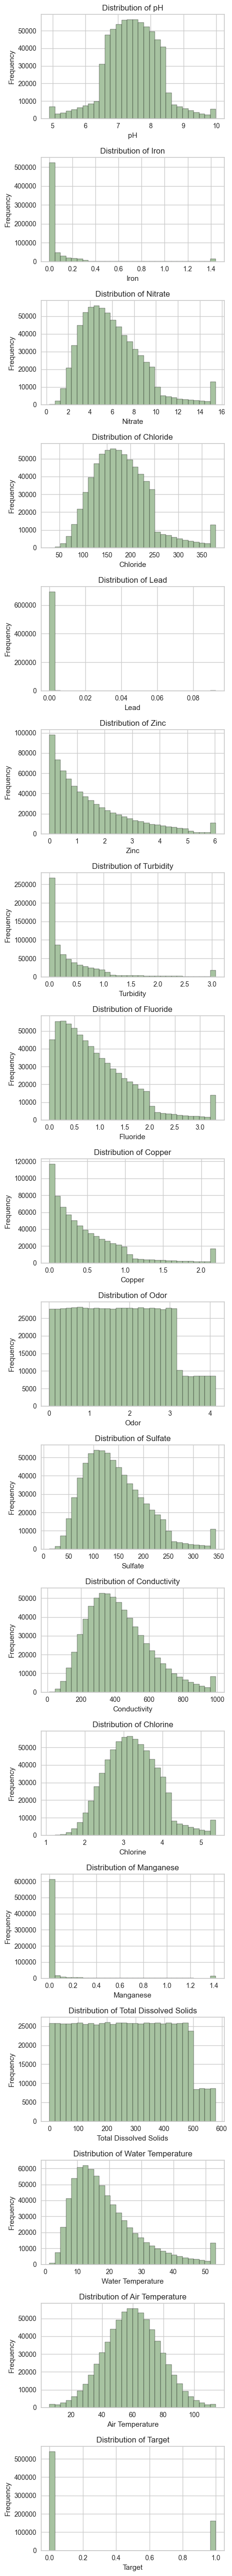

In [17]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots with one histogram per numeric column
fig, axes = plt.subplots(nrows=len(numeric_columns), figsize=(5, 3 * len(numeric_columns)))

# Loop over each numeric column to create a histogram for each
for i, column in enumerate(numeric_columns):
    axes[i].hist(df[column], bins=30, color='#A7C3A1', edgecolor='black')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()

# Display the plots
plt.show()

**pH**: The distribution is symmetric and resembles a bell curve. Most values are concentrated between 6-8, indicating that the water's pH is generally neutral.

**Iron**: Most values are very close to 0. This shows that water samples generally have low iron levels.

**Nitrate**: The distribution is mainly concentrated in low values, with a left-skewed distribution.

**Chloride**: The distribution forms a bell curve, with most values concentrated between 150-250 mg/L.

**Lead**: There is a significant concentration in very low values. This indicates that the water has largely low lead content.

**Zinc**: The distribution for zinc is mostly inclined toward low values. Most data is between 0-1 mg/L.

**Turbidity**: The values are generally concentrated between 0-0.5, indicating that the water typically has low turbidity levels.

**Fluoride**: There is predominantly a low concentration of fluoride (0-1 mg/L).

**Copper**: The copper distribution is concentrated at low values (0-1 mg/L).

**Odor**: The distribution is normal between 0-3, but it is lower between 3-4.

**Sulfate**: The distribution is bell-shaped, concentrated between 100-250 mg/L.

**Conductivity**: Most values are between 200-700 µS/cm, which generally indicates water with moderate levels of dissolved minerals.

**Chlorine**: Most values are between 1-3.

**Manganese**: The distribution is heavily concentrated at very low values, indicating that manganese levels are generally low.

**Total Dissolved Solids**: The distribution is normal between 0-500, but the frequency decreases after 500.

**Water Temperature**: The distribution resembles a normal curve and is generally around 20-30°C.

**Air Temperature**: The distribution resembles a normal curve and is generally around 50-70°C.

**Target**: Most values are 0.

In [18]:
# Standart scaler is used to standardize the input data in a way that ensures that the data points have a balanced scale.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

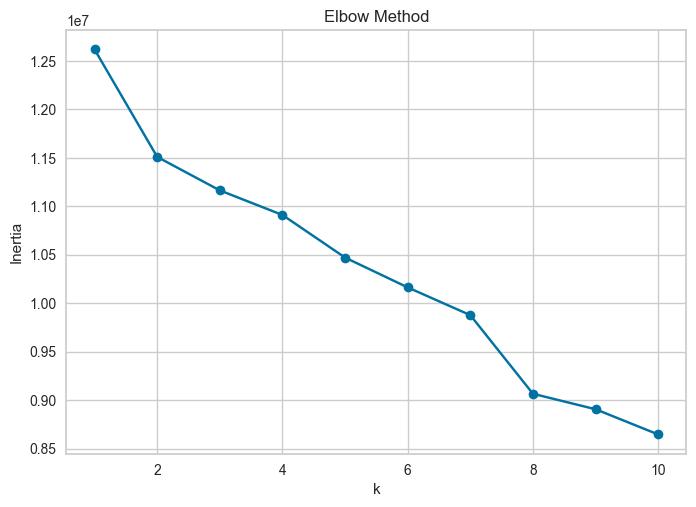

In [19]:
inertia = []  # List to store inertia values for different numbers of clusters

for k in range(1, 11):  # Loop over cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)  # Fit KMeans for k clusters
    inertia.append(kmeans.inertia_)  # Append the inertia value for the current k

# Plotting the inertia values to determine the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')  # Line plot with markers for each k
plt.xlabel('k')  # Label for the x-axis
plt.ylabel('Inertia')  # Label for the y-axis
plt.title('Elbow Method')  # Title of the plot
plt.show()  # Display the plot

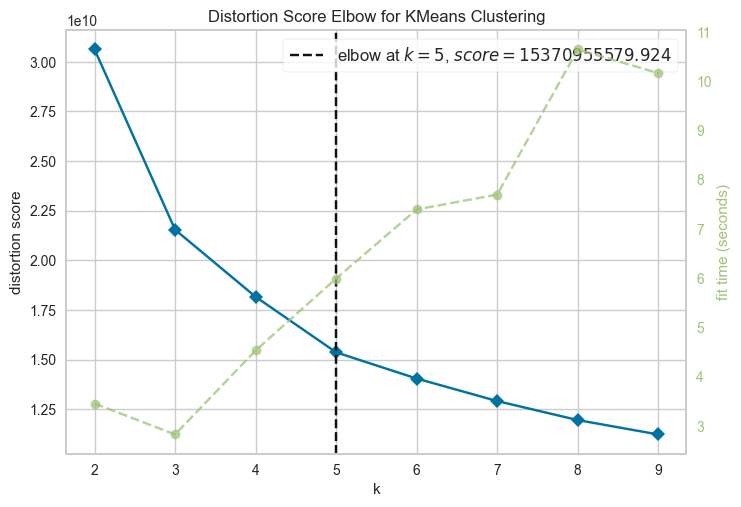

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Initialize the KMeans model with random state and number of initializations
kmeans = KMeans(random_state=0, n_init=10)  

# Use KElbowVisualizer to determine the optimal number of clusters (k)
elbow = KElbowVisualizer(kmeans, random_state=0, k=(2, 10))  

# Fit the model to the data
elbow.fit(df)  

# Display the elbow plot
elbow.show()  

According to the elbow method, the optimal value of \( k \) was chosen as 5.

In [21]:
# Fit the model on the scaled data and predict cluster labels
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

cluster_df = df.copy() # Create a copy of the original data frame
# Add a new column named 'Cluster' to the data frame and assign cluster labels
cluster_df['Cluster'] = clusters

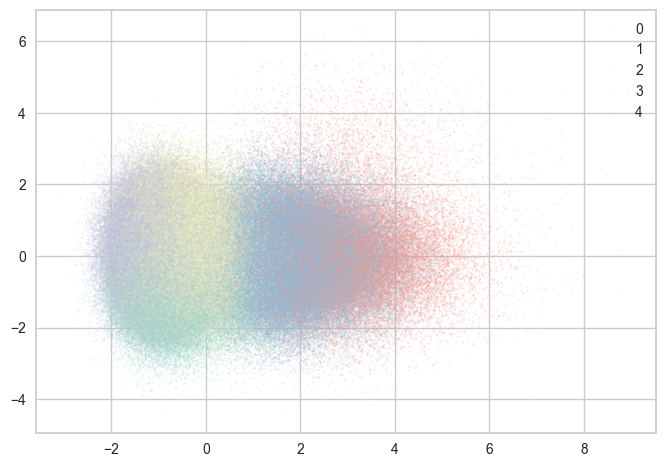

In [22]:
scaled_df = pd.DataFrame(scaled_data, index=df.index, columns=df.columns)
cluster_df = cluster_df.reset_index(drop=True) 
# This will reset the index to start from 0 (most efficient way)

# PCA for dimensionality reduction
pca = PCA(n_components=3)
# Fit the PCA model on the scaled data and transform it
pca_data = pca.fit_transform(scaled_df)  

# Visualization 
sample_size = 700000 # We just wanted the show most of the data in the cluster vizualition
sampled_indices = random.sample(range(len(df)), sample_size)
sampled_data = pca_data[sampled_indices]
sampled_clusters = cluster_df.loc[sampled_indices, 'Cluster']

sns.scatterplot(x=sampled_data[:, 0], y=sampled_data[:, 1], hue=sampled_clusters, palette='Set3', alpha=0.15, s=2) 
plt.legend(loc='upper right') 
plt.show()

In [23]:
data = np.random.rand(1000, 2)  # 2D random data consisting of 1000 samples

# Scaling the data (also important for silhouette score too)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Clusturing with K-means  
kmeans = KMeans(n_clusters=4, random_state=42)  # We create 5 clusters
labels = kmeans.fit_predict(data_scaled)

#Calculating silhouette score
sil_score = silhouette_score(data_scaled, labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.42


In [24]:
sil_scores = []
range_n_clusters = range(2, 10)  # Cluster numbers from 2 to 9

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    sil_score = silhouette_score(data_scaled, labels)
    sil_scores.append(sil_score)
    print(f"Cluster number: {n_clusters}, Silhouette Score: {sil_score:.2f}")

# Finding the best cluster number with Silhouette Score
optimal_k = range_n_clusters[np.argmax(sil_scores)]
print(f"Best Number of Cluster: {optimal_k}")

Cluster number: 2, Silhouette Score: 0.36
Cluster number: 3, Silhouette Score: 0.39
Cluster number: 4, Silhouette Score: 0.42
Cluster number: 5, Silhouette Score: 0.38
Cluster number: 6, Silhouette Score: 0.36
Cluster number: 7, Silhouette Score: 0.36
Cluster number: 8, Silhouette Score: 0.37
Cluster number: 9, Silhouette Score: 0.35
Best Number of Cluster: 4


# **Step 4** : Predictive Modelling and  **Step 5** : Model Evaluation and Visualizations

In [25]:
warnings.filterwarnings("ignore", category=FutureWarning)

# Split the dataset into features (X) and target variable (y)
X = df.drop(columns='Target')  # Features (independent variables)
y = df['Target']  # Target (dependent variable)

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE to balance the training dataset
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature data to ensure consistent scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)  # Fit and transform the resampled training data
X_test_scaled = scaler.transform(X_test)  # Transform the test data

### Logistic Regression

In [26]:
# Initialize the logistic regression model with balanced class weights to handle class imbalance
# and set max_iter to 1000 for more iterations in case convergence requires more steps
model = LogisticRegression(class_weight='balanced', max_iter=1000)

# Train the model using the resampled and scaled training data
model.fit(X_train_scaled, y_resampled)

# Predict the target variable on the scaled test data
y_pred = model.predict(X_test_scaled)

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

# Print the confusion matrix to evaluate the performance of the classifier
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87    161932
           1       0.57      0.71      0.63     48385

    accuracy                           0.81    210317
   macro avg       0.74      0.78      0.75    210317
weighted avg       0.83      0.81      0.82    210317

[[135853  26079]
 [ 13795  34590]]


According to these results, the logistic regression model demonstrates high performance for class 0 (precision: 0.91, recall: 0.84), while the performance for class 1 is lower (precision: 0.57, recall: 0.71). Despite an overall accuracy of 81%, the imbalance between the classes indicates that the model is not as effective at predicting class 1 as it is for class 0.

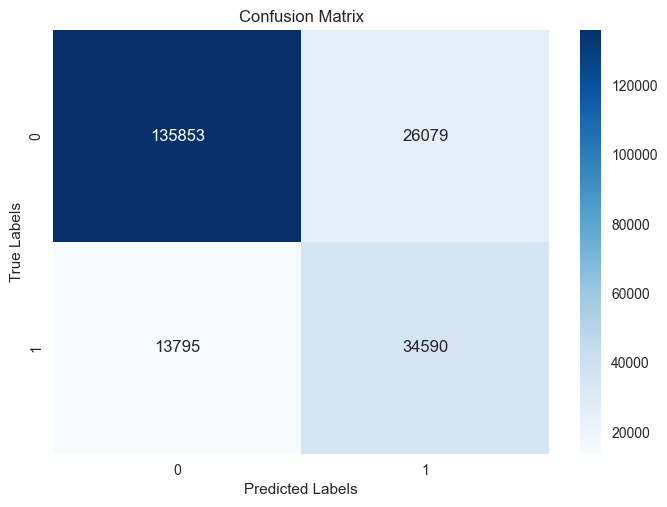

In [27]:
# Generate the confusion matrix for the predicted and actual labels
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with annotations
# 'fmt' is set to 'd' to display integers, and 'cmap' is set to 'Blues' for color scaling
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)

# Set the labels and title for the plot
plt.xlabel('Predicted Labels')  # X-axis label for predicted labels
plt.ylabel('True Labels')  # Y-axis label for true labels
plt.title('Confusion Matrix')  # Title of the plot

# Display the plot
plt.show()

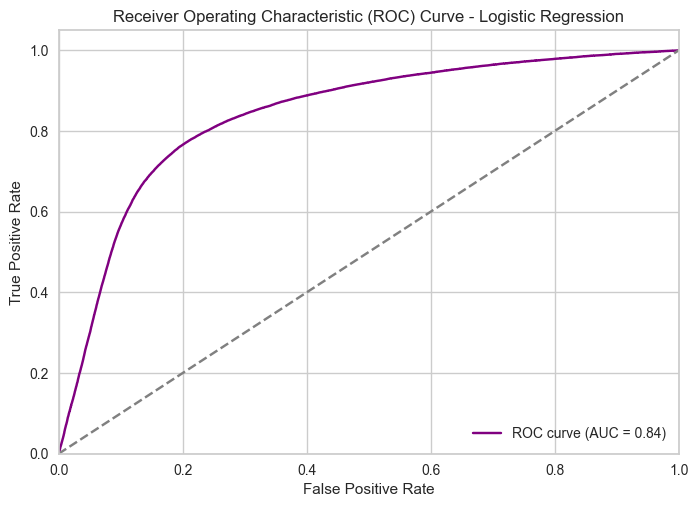

In [28]:
# Get the predicted probabilities for the positive class (class 1) from the logistic regression model
y_prob_lr = model.predict_proba(X_test_scaled)[:, 1]

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)

# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

# Plot the ROC curve, showing the trade-off between TPR and FPR
plt.plot(fpr_lr, tpr_lr, color='purple', label=f'ROC curve (AUC = {roc_auc_lr:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set the limits for the x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels and title for the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')  # Plot title

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

The AUC (Area Under Curve) value of 0.84 obtained for the Logistic Regression model indicates that the model's overall performance in separating classes is quite good. An AUC value close to 1 signifies that the model can accurately distinguish between positive and negative classes. In this case, the predictive performance of the model is satisfactory and demonstrates its effectiveness, especially on imbalanced datasets.

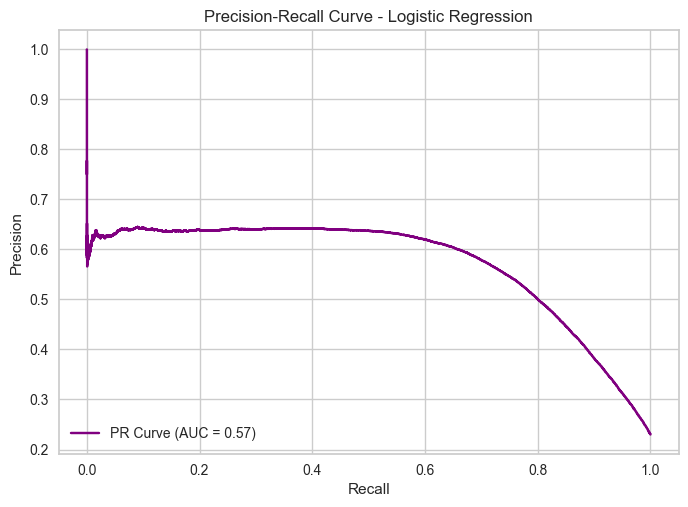

In [29]:
# Compute precision and recall values for different thresholds
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)

# Calculate the Area Under the Precision-Recall Curve (PR AUC)
pr_auc_lr = auc(recall_lr, precision_lr)

# Plot the Precision-Recall curve, showing the trade-off between precision and recall
plt.plot(recall_lr, precision_lr, color='purple', label=f'PR Curve (AUC = {pr_auc_lr:.2f})')

# Set the labels and title for the plot
plt.xlabel('Recall')  # X-axis label for recall
plt.ylabel('Precision')  # Y-axis label for precision
plt.title('Precision-Recall Curve - Logistic Regression')  # Plot title

# Display the legend in the lower left corner
plt.legend(loc='lower left')

# Show the plot
plt.show()

An AUC of 0.57 indicates that the Logistic Regression model performs moderately in distinguishing between the classes. It shows the model's ability to predict the positive class.

### Decision Tree Classifier

In [30]:
# Initialize the Decision Tree classifier with a maximum depth of 7 and a random state for reproducibility
model_dt = DecisionTreeClassifier(max_depth=7, random_state=42)

# Train the model using the resampled and scaled training data
model_dt.fit(X_train_scaled, y_resampled)

# Make predictions on the scaled test data
pred_dt = model_dt.predict(X_test_scaled)

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(classification_report(y_test, pred_dt))

# Print the confusion matrix to evaluate the performance of the decision tree classifier
print(confusion_matrix(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.86      0.90    161932
           1       0.65      0.87      0.74     48385

    accuracy                           0.86    210317
   macro avg       0.80      0.86      0.82    210317
weighted avg       0.89      0.86      0.87    210317

[[138818  23114]
 [  6235  42150]]


The results for the Decision Tree model show that it performs well for class 0 (precision: 0.96, recall: 0.86), but its performance for class 1 is somewhat lower (precision: 0.65, recall: 0.87). While the recall for class 1 is high, the precision is not as good as for class 0. This indicates that the model correctly predicts more instances of class 1, but it also makes more false positive errors. The overall accuracy is 86%, indicating that the model performs reasonably well for both classes, but the imbalance in the data presents some challenges.

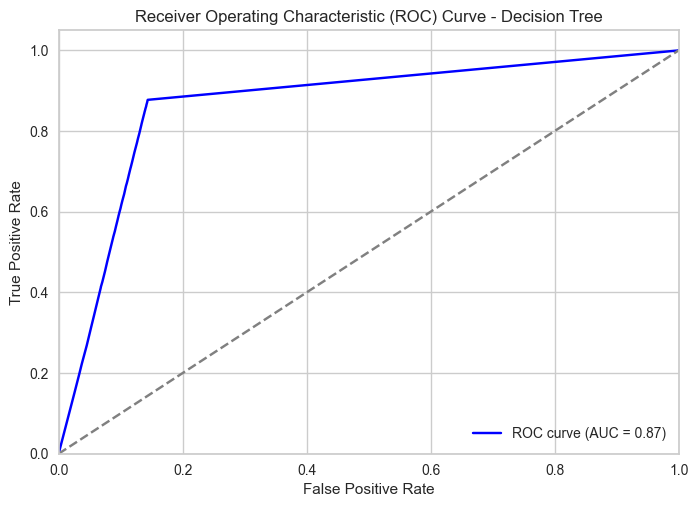

In [31]:
# Get the predicted probabilities for the positive class (class 1) from the decision tree model
y_prob_dt = model_dt.predict_proba(X_test_scaled)[:, 1]

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)

# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot the ROC curve, showing the trade-off between TPR and FPR
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'ROC curve (AUC = {roc_auc_dt:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set the limits for the x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels and title for the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')  # Plot title

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

The AUC value of 0.87 obtained for the Decision Tree model demonstrates its high performance in classifying the classes. This value indicates that the model is highly successful in distinguishing between positive and negative classes. An AUC value close to 1 reflects the model's high accuracy and effectiveness in the classification task. This result highlights that the Decision Tree model has successfully captured patterns in the dataset and performs exceptionally well in terms of class separation.

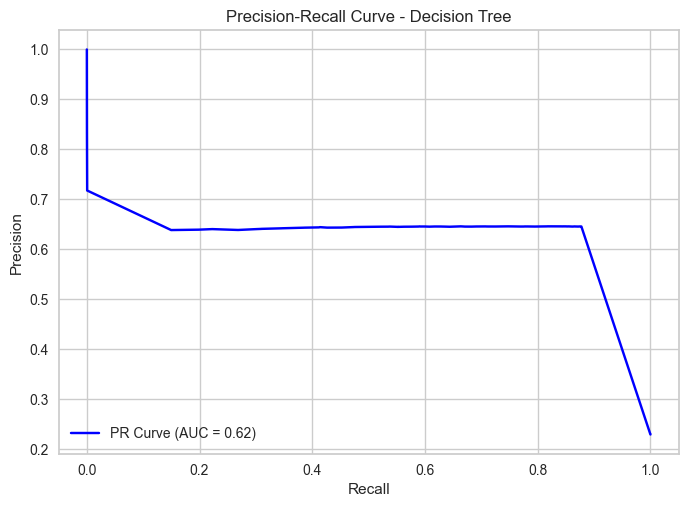

In [32]:
# Compute precision and recall values for different thresholds from the decision tree model
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_prob_dt)

# Calculate the Area Under the Precision-Recall Curve (PR AUC)
pr_auc_dt = auc(recall_dt, precision_dt)

# Plot the Precision-Recall curve, showing the trade-off between precision and recall
plt.plot(recall_dt, precision_dt, color='blue', label=f'PR Curve (AUC = {pr_auc_dt:.2f})')

# Set the labels and title for the plot
plt.xlabel('Recall')  # X-axis label for recall
plt.ylabel('Precision')  # Y-axis label for precision
plt.title('Precision-Recall Curve - Decision Tree')  # Plot title

# Display the legend in the lower left corner
plt.legend(loc='lower left')

# Show the plot
plt.show()

An AUC of 0.62 indicates that the Decision Tree model performs moderately in distinguishing between the classes. It shows the model's ability to predict the positive class.

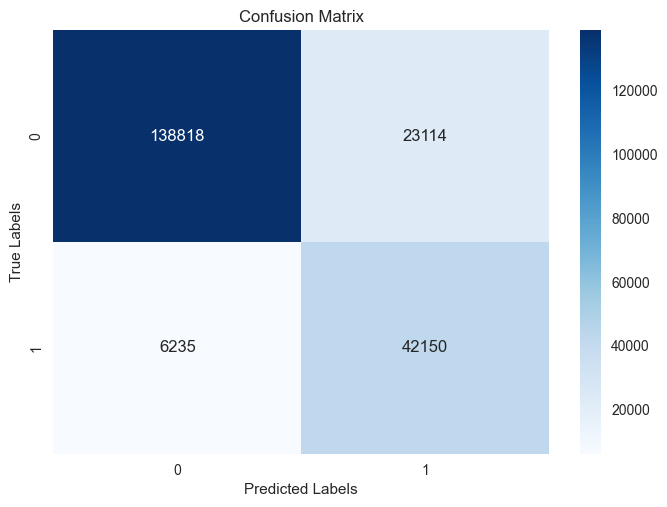

In [33]:
# Generate the confusion matrix for the predicted and actual labels from the decision tree model
cm = confusion_matrix(y_test, pred_dt)

# Create a heatmap for the confusion matrix with annotations
# 'fmt' is set to 'd' to display integers, and 'cmap' is set to 'Blues' for color scaling
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model_dt.classes_, yticklabels=model_dt.classes_)

# Set the labels and title for the plot
plt.xlabel('Predicted Labels')  # X-axis label for predicted labels
plt.ylabel('True Labels')  # Y-axis label for true labels
plt.title('Confusion Matrix')  # Title of the plot

# Display the plot
plt.show()

### Random Forest Classifier

In [34]:
# Initialize the Random Forest classifier model
model_rf = RandomForestClassifier()

# Train the model using the resampled and scaled training data
model_rf.fit(X_train_scaled, y_resampled)

# Make predictions on the scaled test data
pred_rf = model_rf.predict(X_test_scaled)

# Print the classification report which includes precision, recall, f1-score, and support for each class
print(classification_report(y_test, pred_rf))

# Print the confusion matrix to evaluate the performance of the Random Forest classifier
print(confusion_matrix(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91    161932
           1       0.65      0.97      0.78     48385

    accuracy                           0.87    210317
   macro avg       0.82      0.91      0.85    210317
weighted avg       0.91      0.87      0.88    210317

[[136883  25049]
 [  1470  46915]]


The results for the Random Forest model show that it performs exceptionally well for class 0 (precision: 0.99, recall: 0.85), but its performance for class 1 is somewhat lower (precision: 0.65, recall: 0.97). While the recall for class 1 is very high (0.97), indicating the model's success in correctly classifying instances of class 1, the lower precision suggests that it makes more false positive errors. The overall accuracy is 87%, indicating that the model performs well for both classes and is particularly effective even with imbalanced data.

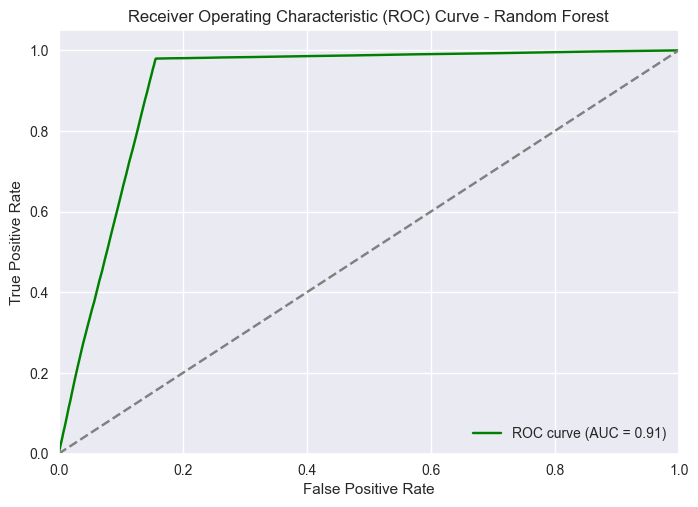

In [36]:
# Get the predicted probabilities for the positive class (class 1) from the random forest model
y_prob_rf = model_rf.predict_proba(X_test_scaled)[:, 1]

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR) for different thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate the Area Under the Curve (AUC) for the ROC curve
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

# Plot the ROC curve, showing the trade-off between TPR and FPR
plt.plot(fpr_rf, tpr_rf, color='green', label=f'ROC curve (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set the limits for the x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Set the labels and title for the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')  # Plot title

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

The AUC value of 0.91 obtained for the Random Forest model indicates near-perfect performance in classifying the classes. This value shows that the model has an exceptionally high ability to distinguish between positive and negative classes, making it highly effective in the classification task. Random Forest benefits from the collective power of multiple decision trees, which provides high accuracy and generalization performance. This result confirms that the model has successfully captured patterns in the dataset and demonstrates outstanding performance in terms of class separation.

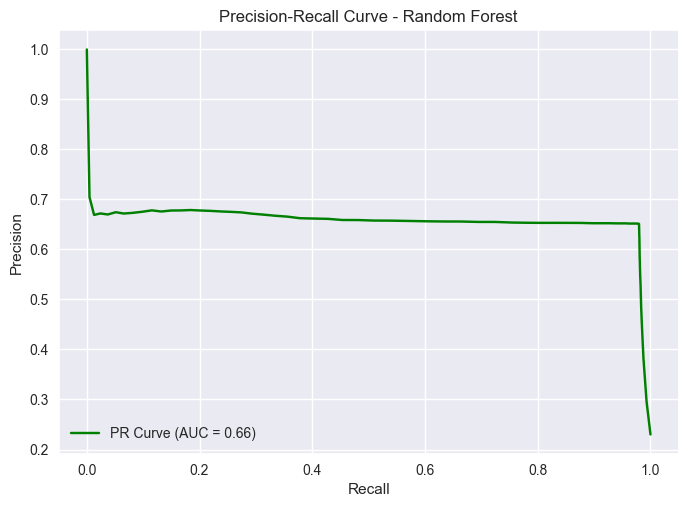

In [37]:
# Compute precision and recall values for different thresholds from the random forest model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)

# Calculate the Area Under the Precision-Recall Curve (PR AUC)
pr_auc_rf = auc(recall_rf, precision_rf)

# Plot the Precision-Recall curve, showing the trade-off between precision and recall
plt.plot(recall_rf, precision_rf, color='green', label=f'PR Curve (AUC = {pr_auc_rf:.2f})')

# Set the labels and title for the plot
plt.xlabel('Recall')  # X-axis label for recall
plt.ylabel('Precision')  # Y-axis label for precision
plt.title('Precision-Recall Curve - Random Forest')  # Plot title

# Display the legend in the lower left corner
plt.legend(loc='lower left')

# Show the plot
plt.show()

An AUC of 0.66 for the Precision-Recall (PR) curve in the Random Forest model indicates a strong performance in predicting the positive class, outperforming the other classifiers in this case. This value reflects that the model is quite effective in distinguishing between the classes, particularly in scenarios with imbalanced datasets. Compared to the Logistic Regression and Decision Tree models, which have lower PR AUC values, Random Forest exhibits the best overall performance in terms of both precision and recall for the positive class. This highlights its superior ability to correctly identify and classify positive instances, making it the most reliable model among the ones tested.

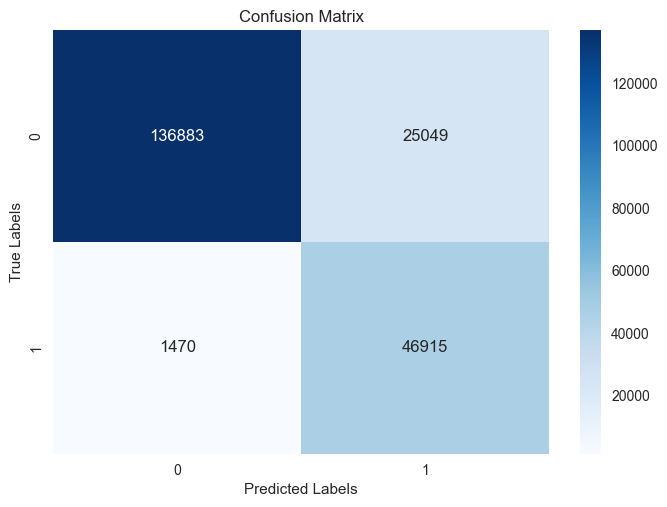

In [38]:
cm = confusion_matrix(y_test, pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

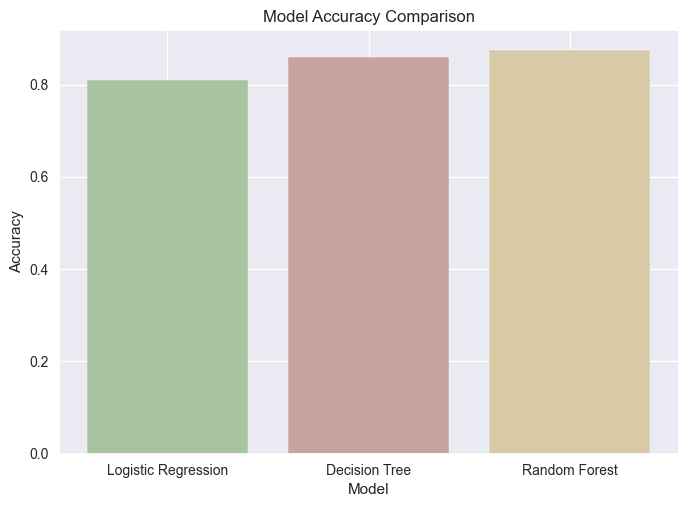

In [39]:
# Make predictions using the trained models (Logistic Regression, Decision Tree, Random Forest)
pred_lr = model.predict(X_test_scaled)
pred_dt = model_dt.predict(X_test_scaled)
pred_rf = model_rf.predict(X_test_scaled)

# Calculate the accuracy for each model
accuracy_lr = accuracy_score(y_test, pred_lr)
accuracy_dt = accuracy_score(y_test, pred_dt)
accuracy_rf = accuracy_score(y_test, pred_rf)

# Store the accuracies in a list
accuracies = [accuracy_lr, accuracy_dt, accuracy_rf]

# Define the model names for the x-axis
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

# Create a bar plot to compare the accuracies of each model
plt.bar(models, accuracies, color=['#A7C3A1', '#C7A3A1', '#D8C9A7'])

# Set the title and labels for the plot
plt.title('Model Accuracy Comparison')  # Title of the plot
plt.xlabel('Model')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label

# Display the plot
plt.show()

According to the accuracy table, the lowest accuracy is observed in the Logistic Regression model, followed by Decision Tree, and the highest accuracy is in Random Forest. All three models have an accuracy above 0.80, with Logistic Regression showing lower accuracy in class separation, while Decision Tree and Random Forest perform better with higher accuracies. Random Forest, being a combination of decision trees, provides stronger results and thus demonstrates the best performance.

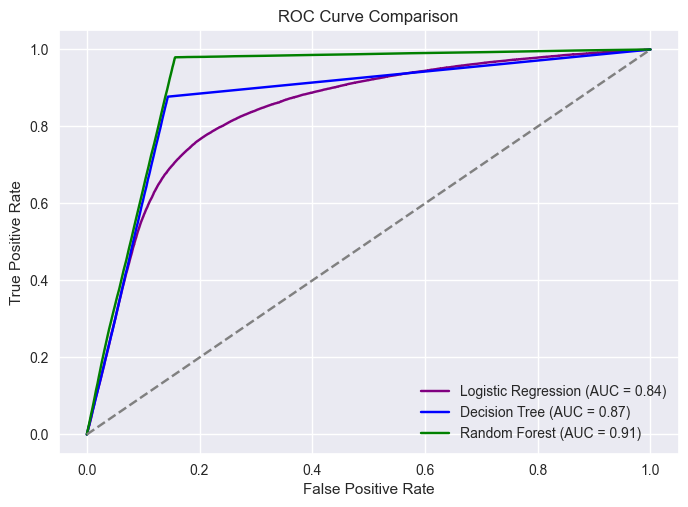

In [40]:
# Plot the ROC curve for Logistic Regression
plt.plot(fpr_lr, tpr_lr, color='purple', label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Plot the ROC curve for Decision Tree
plt.plot(fpr_dt, tpr_dt, color='blue', label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

# Plot the ROC curve for Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot the diagonal line representing a random classifier
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set the title and labels for the plot
plt.title('ROC Curve Comparison')  # Title of the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()


When comparing the ROC and AUC values, Random Forest provides the best result with an AUC of 0.91, which is very close to 1. This indicates excellent performance in distinguishing between the classes. Following that, the Decision Tree model achieves an AUC of 0.87, which also shows strong classification performance. Lastly, Logistic Regression has an AUC of 0.84, which, although lower than the other two models, still indicates a reasonable ability to differentiate between classes, but not as effectively as the Decision Tree or Random Forest models.

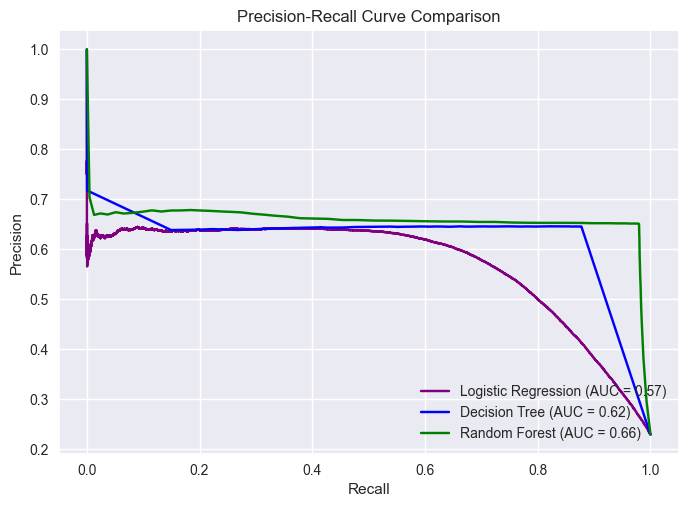

In [41]:
# Plot the Precision-Recall curve for Logistic Regression
plt.plot(recall_lr, precision_lr, color='purple', label=f'Logistic Regression (AUC = {pr_auc_lr:.2f})')

# Plot the Precision-Recall curve for Decision Tree
plt.plot(recall_dt, precision_dt, color='blue', label=f'Decision Tree (AUC = {pr_auc_dt:.2f})')

# Plot the Precision-Recall curve for Random Forest
plt.plot(recall_rf, precision_rf, color='green', label=f'Random Forest (AUC = {pr_auc_rf:.2f})')

# Set the title and labels for the plot
plt.title('Precision-Recall Curve Comparison')  # Title of the plot
plt.xlabel('Recall')  # X-axis label for recall
plt.ylabel('Precision')  # Y-axis label for precision

# Display the legend in the lower right corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

When evaluating the PR (Precision-Recall) curve, the highest AUC value of 0.66 belongs to the Random Forest model, indicating that it performs well even with class imbalance. The Decision Tree model follows with an AUC of 0.62, showing a moderate ability to predict the positive class. The lowest AUC of 0.57 belongs to the Logistic Regression model, indicating a lower performance in distinguishing the positive class.

**Model Selection: Logistic Regression, Decision Tree, and Random Forest**

In this project, Logistic Regression, Decision Tree, and Random Forest models were chosen to predict water quality. These models represent varying levels of complexity and classification methods, enabling a comprehensive analysis of the dataset. Below is a detailed explanation of each model’s advantages, disadvantages, and contributions in the context of the project:

**1. Logistic Regression**

Role in the Project: Logistic Regression was selected as a baseline model to test its ability to learn linear relationships in the data. It was particularly useful for analyzing simple relationships, such as those between pH levels and chemical concentrations.

**Advantages:**

Quick to train and provides results that are easy to interpret.
Directly predicts the probability of water quality being high or low.

**Disadvantages:**

Cannot capture complex, non-linear relationships in the data.
Performance may degrade in high-dimensional and heterogeneous datasets.
Results: Logistic Regression served as a foundational benchmark model. While its performance was limited due to its linear assumptions, it provided a quick reference point for evaluating other models.

**2. Decision Tree**

Role in the Project: Decision Tree was chosen to uncover non-linear relationships and provide a more detailed analysis for classification. It was particularly suited to discover complex patterns between physical and chemical properties of water.

**Advantages:**

Handles both numerical and categorical features effectively.
Identifies key features, making it easy to determine which variables have the most significant impact on predictions.

**Disadvantages:**

A deep tree can lead to overfitting.
Computational cost may increase for larger datasets.
Results: The Decision Tree model outperformed Logistic Regression and provided valuable insights into the dataset. It was especially effective in identifying the influence of categorical features.

**3. Random Forest**

Role in the Project: Random Forest was selected to combine the predictions of multiple decision trees, ensuring higher stability and accuracy. It served as the most sophisticated model for predicting water quality.

**Advantages:**

Produces accurate and robust predictions with a lower risk of overfitting.
Evaluates feature importance, helping to identify critical variables affecting water quality.

**Disadvantages:**

Training time and resource consumption are higher compared to simpler models.
Predictions are less interpretable compared to single decision trees.
Results: The Random Forest model delivered the best results among all three models. Its ability to handle the complexity and variety of the dataset led to the highest classification performance.

**Comparative Performance Evaluation**
The performance of the three models was evaluated using metrics such as accuracy, precision, recall, and F1-score:

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | 0.81     | 0.83      | 0.81   | 0.82     |
| Decision Tree       | 0.86     | 0.89      | 0.86   | 0.87     |
| Random Forest       | 0.87     | 0.91      | 0.87   | 0.88     |  


Logistic Regression provided a quick and straightforward solution but struggled to learn complex patterns.
Decision Tree captured non-linear relationships, improving performance significantly.
Random Forest achieved the highest accuracy and overall performance, making it the most effective model in this context.
Overall Evaluation
Using these models together allowed us to approach the classification problem from multiple perspectives:

Logistic Regression provided a baseline for initial analysis.
Decision Tree uncovered non-linear relationships and highlighted feature importance.
Random Forest achieved the best accuracy, making it the final choice for decision-making.
This strategic approach to model selection ensured that the water quality prediction problem was addressed effectively.